In [10]:
import numpy as np
import matplotlib.pyplot as plt

### 1) Make an array of the first 12 even numbers with shape (2, 6). Print the resulting array following each step below.

* Make every other value of the second row odd by subtracting 1 from it.
* Reverse the columns of the first row.
* Make the last value of the entire array the sum of all the other numbers beside the last value.
* Normalize each column of the array so that it sums to 1.

In [2]:
even = 2 * np.arange(12).reshape(2, 6) + 2


print(even)
even[1, ::2] -= 1
print(even)

# reverse
even[0, :] = even[0, ::-1]
print(even)

# make last value of the entire array the sum of all the other numbers beside it
even[-1, -1] = np.sum(even) - even[-1, -1]
print(even)

# normalize each column of the array so that it sums to 1
even = even / np.sum(even,axis=0)
print(even)

[[ 2  4  6  8 10 12]
 [14 16 18 20 22 24]]
[[ 2  4  6  8 10 12]
 [13 16 17 20 21 24]]
[[12 10  8  6  4  2]
 [13 16 17 20 21 24]]
[[ 12  10   8   6   4   2]
 [ 13  16  17  20  21 129]]
[[0.48       0.38461538 0.32       0.23076923 0.16       0.01526718]
 [0.52       0.61538462 0.68       0.76923077 0.84       0.98473282]]


 ### 2) Create a two-dimensional array called *pts*, where the first columns contains 100 values of x linearly spaced from -5 to 5 and the second column contains the values for y = 0.5x - 1.
 
 * Print the shape of *pts* to ensure you have created the array correctly.
 * Introduce uniformly distribution noise from (-1, 3) into the y values of the *pts*.
 * Ensure that the noise you introduced was distributed as you intended by plotting a histogram of the values you used for the noise.
 * Create a scatter plot using the first and second columns of the *pts* array as x and y, respectively. Plot the line y = 0.5x - 1 on top of the scatter plot. Explain why the line does not appear to be the best fit to the points.

(100,)
(100, 2)


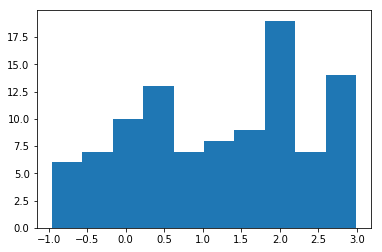

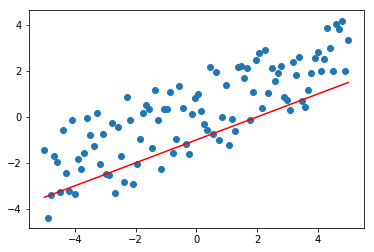

In [8]:
x = np.linspace(-5, 5, 100)
y = 0.5 * x - 1
print(y.shape)
pts = np.column_stack((x, y))
print(pts.shape)

noise = 4 * np.random.rand(100) - 1
pts[:, 1] = pts[:, 1] + noise
plt.hist(noise)

x2, y2 = pts[:, 0], pts[:, 1]
plt.figure()
plt.scatter(x2, y2)
plt.plot(x, y, 'r')

### 3) This will require a bit of googling around on your part. Make an array using linspace that goes from 0 to 360 in 180 steps. 
* Find all numbers in the array that are greater than 20
* Find all numbers in the array that less than 160 and greater than 45
* Find all numbers greater than 20 and less than 40 and assign to variable x. Then find all numbers that are greater than 60 and less than 81 and assign to variable y. 
    * Use an if...else statement and a boolean test to see if x and y are the same length. If they are, then multiply each element of x with the corresponding element in y. Do this first with a loop and then using the numpy equivalent. If x and y are not the same length then crop the longer of the two so that they are and then do the element by element multipication using a for loop and then using the numpy equivalent. A good implementation of this will handle all cases if you change the range of values assigned to x and y (i.e. it will handle when x is longer than y and when y is longer than x). 
* **Worth 5,000 bonus points**: which method, for loop vs numpy way, is faster? Google "cell magic timeit". Hint: when using the cell magic timeit, you'll need to do all variable assignments in the cell that you're timing (i.e. you'll need to assign x, y again in that cell)

In [40]:
z = np.linspace(0,360,180)

# part 1
x = z[(z>20)]
# print(x)

# part 2
x = z[(z<160)&(z>45)]
# print(x)

# part 3
x = z[((z>20) & (z<40))]
y = z[(z>80) & (z<101)]

# way one, with for loops
if len(x)==len(y):
    out = np.full(len(x), np.nan)
    for cnt in np.arange(len(x)):
        out[cnt] = x[cnt]*y[cnt]
else:
    # crop the longer...
    if len(x)>len(y):
        x = x[:len(y)]
    elif len(y)>len(x):
        y = y[:len(x)]

    # then loop 
    out = np.full(len(x), np.nan)
    for cnt in np.arange(len(x)):
        out[cnt] = x[cnt]*y[cnt]    
        
        
# way two, without for loops
if len(x)==len(y):
    out = np.multiply(x,y)
else:
    # crop the longer...
    if len(x)>len(y):
        x = x[:len(y)]
    elif len(y)>len(x):
        y = y[:len(x)]

    # then loop 
    out = np.multiply(x,y)

[1617.92703099 1824.21272744 2038.58805905 2261.05302581 2491.60762773
 2730.2518648  2976.98573702 3231.80924441 3494.72238694 3765.72516463]


In [60]:
%timeit x = np.linspace(0,1000,100)

19.9 µs ± 532 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [61]:
%%timeit

z = np.linspace(0,360,180)
# part 3
x = z[(z>20) & (z<40)]
y = z[(z>80) & (z<101)]

# way one, with for loops
if len(x)==len(y):
    out = np.full(len(x), np.nan)
    for cnt in np.arange(len(x)):
        out[cnt] = x[cnt]*y[cnt]
else:
    # crop the longer...
    if len(x)>len(y):
        x = x[:len(y)]
    elif len(y)>len(x):
        y = y[:len(x)]

    # then loop 
    out = np.full(len(x), np.nan)
    for cnt in np.arange(len(x)):
        out[cnt] = x[cnt]*y[cnt] 

40.4 µs ± 2.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [62]:
%%timeit
z = np.linspace(0,360,180)
# part 3
x = z[(z>20) & (z<40)]
y = z[(z>80) & (z<101)]

# way two, without for loops
if len(x)==len(y):
    out = np.multiply(x,y)
else:
    # crop the longer...
    if len(x)>len(y):
        x = x[:len(y)]
    elif len(y)>len(x):
        y = y[:len(x)]

    # then loop 
    out = np.multiply(x,y)

29.9 µs ± 1.91 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [63]:
%%timeit

z = np.linspace(0,100,5000)
x = np.linspace(0,100,5000)

out = np.zeros(len(z))
for n in range(len(z)):
    out[n] = z[n]*x[n]


1.49 ms ± 35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [64]:
%%timeit

z = np.linspace(0,100,5000)
x = np.linspace(0,100,5000)

out = np.multiply(z,x)

63.5 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### 4) Bonus: You are an administrative assistant for a small company. As part of your job as an administrative assistant, you are in charge of payroll for the company's five employees. Each of the employees receives a 3% raise each year. Every five years that an employee is a part of the company, they receive a 5,000 USD increase to their salary on top of the 3% raise (the 3% is applied before the 5,000 USD bonus). 

The five employees are:
* Petunia has been at the company 3 years and her salary is 55,000 USD
* Severus has been at the company 16 years and his salary is 85,000 USD
* Albus has been at the company 30 years and his salary is 115,000 USD
* Ginny has been at the company 8 years and her salary is 75,000 USD
* Harry just started at the company and his salary is 50,000 USD

**Note**: We asked you to solve this problem using lists last week. See if you can solve this problem more quickly using NumPy.

Here are your tasks:
* a) Calculate and print the salary of each employee 5 years from now.
* b) Determine and  print what the total payroll will be in 20 years, assuming nobody new starts and nobody leaves the company.
* c) **Challenge Problem**: Calculate and print the starting salary of each employee, assuming the same protocol for raises had been in place all along.

In [19]:
arr = np.array([[3.0, 55.0],[16, 85.0],[30, 115.0],[8, 75.0], [0, 50.0]])
names = ['Petunia', 'Severus', 'Albus', 'Ginny', 'Harry']

five_yrs = arr.copy()
for _ in range(5):
    five_yrs[:, 1] *= 1.03
    five_yrs[five_yrs[:, 0] % 5 == 0, 1] += 5
for employee, (_, salary) in zip(names, five_yrs):
    print("{}'s salary will be {:.2f} USD 5 years from now.".format(employee, salary*1000))
    
twenty_yrs = arr.copy()
for _ in range(20):
    twenty_yrs[:, 1] *= 1.03
    twenty_yrs[twenty_yrs[:, 0] % 5 == 0, 1] += 5
print('\nThe total payroll in 20 years will be {:.2f} USD.\n'.format(np.sum(twenty_yrs[:,1])*1000))

starting = arr.copy()
while sum(starting[:, 0]) > 0:
    starting[np.logical_and(starting[:, 0] % 5 == 0, starting[:, 0] != 0), 1] -= 5
    starting[starting[:, 0] != 0, 1] *= 0.97
    starting[starting[:, 0] != 0, 0] -= 1
for employee, (_, salary) in zip(names, starting):
    print("{}'s starting salary was {:.2f} USD.".format(employee, salary*1000))

Petunia's salary will be 63760.07 USD 5 years from now.
Severus's salary will be 98538.30 USD 5 years from now.
Albus's salary will be 159862.20 USD 5 years from now.
Ginny's salary will be 86945.56 USD 5 years from now.
Harry's salary will be 84509.38 USD 5 years from now.

The total payroll in 20 years will be 955026.01 USD.

Petunia's starting salary was 50197.01 USD.
Severus's starting salary was 41064.51 USD.
Albus's starting salary was 27909.89 USD.
Ginny's starting salary was 54487.08 USD.
Harry's starting salary was 50000.00 USD.


In [56]:
arr = np.arange(0,24,2).reshape(2,6)

print(arr)

x = np.subtract(arr[1,::2],1)

arr[1,::2] = np.subtract(arr[1,::2],1)


print(arr)

[[ 0  2  4  6  8 10]
 [12 14 16 18 20 22]]
[[ 0  2  4  6  8 10]
 [11 14 15 18 19 22]]
